In [49]:
import numpy as np
Nexc=2
Ninh=2
rexc=0.1
rinh=0.1
Gexc=5
Ginh=5
Tau1exc=0.5
Tau2exc=0.25
Tau1inh=1
Tau2inh=0.5
Esynexc=50 #mv 
Esyninh=-100
dPsexc=0.1
dPsinh=0.1
a=10
b=0
c=-82.7
d=0
V=-82.7
u=b*V
tmin=0
timestep=0.01
tmax=200

In [50]:
VV=[]
uu=[]
tmin=0
spikes=0
spikeslist=[]
tj=0
tjlist=[]
minhlist=[]
mexclist=[]
Ainh=0
Binh=0
Aexc=0
Bexc=0
ninh=((Tau2inh/Tau1inh)**(Tau2inh/(Tau1inh-Tau2inh))-(Tau2inh/Tau1inh)**(Tau1inh/(Tau1inh-Tau2inh)))**-1
nexc=((Tau2exc/Tau1exc)**(Tau2exc/(Tau1exc-Tau2exc))-(Tau2exc/Tau1exc)**(Tau1exc/(Tau1exc-Tau2exc)))**-1

while tmin<(tmax-timestep):
    minh=np.random.binomial(Ninh, rinh*timestep)
    minhlist.append(minh)
    mexc=np.random.binomial(Nexc, rexc*timestep)
    mexclist.append(mexc)
    Psinh=ninh*(Ainh-Binh)
    Psexc=nexc*(Aexc-Bexc)
    Isinh=Ginh*Psinh*(V-Esyninh)
    Isexc=Gexc*Psexc*(V-Esynexc)
    I=Isexc+Isinh
    V = V + timestep*(0.04*V**2+5*V+140-u-I)
    u = u + timestep*a*(b*V-u)
    if minh>0:
        Ainh=Ainh+minh*dPsinh*(1-Psinh)
        Binh=Binh+minh*dPsinh*(1-Psinh)
    else:
        Ainh=Ainh+timestep*(-Ainh/Tau1inh)
        Binh=Binh+timestep*(-Binh/Tau2inh)
    if mexc>0:
        Aexc=Aexc+mexc*dPsexc*(1-Psexc)
        Bexc=Bexc+mexc*dPsexc*(1-Psexc)
    else:
        Aexc=Aexc+timestep*(-Aexc/Tau1exc)
        Bexc=Bexc+timestep*(-Bexc/Tau2exc)
    if V>30:
        VV.append(30)
        V=c
        u=u+d
        spikes+=1 #tracker for 2.b spiking in bins
        tj=tmin-tj #tracker for 2.b inter spiek interval
        tjlist.append(tj)
    else:
        VV.append(V)
    if (tmin%20<0.01): #at bin size, creates list item of spikes and resets counter
        spikeslist.append(spikes)
        spikes=0
    uu.append(u)
    tmin+=timestep



Text(0.5, 0, 'Time')

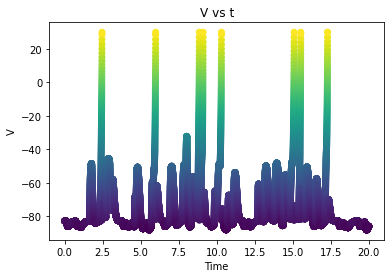

In [52]:
import math
import matplotlib.pyplot as plt
T=np.linspace(0, 20, 20000)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(T, VV, c=VV)
ax.set_title("V vs t")
ax.set_ylabel('V')
ax.set_xlabel('Time')

mean= 1.4 variance= 0.6400000000000001
minh, mexc spikerate: 170.0 200.0


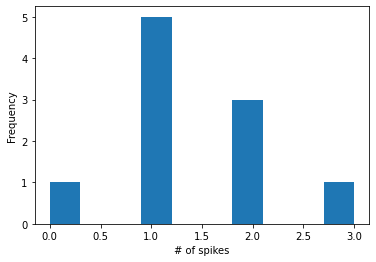

In [4]:
#number of spikes in each section
plt.hist(spikeslist)
plt.xlabel('# of spikes')
plt.ylabel('Frequency')
plt.show

#mean and variance
mean=sum(spikeslist)/len(spikeslist)
variance=sum((i-mean)**2 for i in spikeslist)/len(spikeslist)
print("mean=",mean, "variance=", variance)

#firing rates
minhrate=sum(minhlist)/(tmax)*1000 #spikes/sec
mexcrate=sum(mexclist)/(tmax)*1000 #spikes/sec
print ("minh, mexc spikerate:", minhrate, mexcrate)

<function matplotlib.pyplot.show(close=None, block=None)>

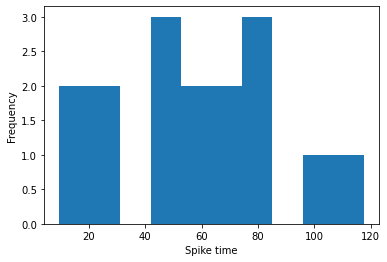

In [5]:
#inter-spike intervals
plt.hist(tjlist)
plt.xlabel('Spike time')
plt.ylabel('Frequency')
plt.show

In [29]:
#recast variables as only excitatory
Nexc=100
Ninh=0
rexc=.1
rinh=0.1
Gexc=40
Ginh=0
Esyninh=-82.7
tmax=20
V=-82.7

In [44]:
VV=[]
uu=[]
tmin=0
spikes=0
spikeslist=[]
tj=0
tjlist=[]
minhlist=[]
mexclist=[]
Ainh=0
Binh=0
Aexc=0
Bexc=0
ninh=((Tau2inh/Tau1inh)**(Tau2inh/(Tau1inh-Tau2inh))-(Tau2inh/Tau1inh)**(Tau1inh/(Tau1inh-Tau2inh)))**-1
nexc=((Tau2exc/Tau1exc)**(Tau2exc/(Tau1exc-Tau2exc))-(Tau2exc/Tau1exc)**(Tau1exc/(Tau1exc-Tau2exc)))**-1

while tmin<(tmax-timestep):
    minh=np.random.binomial(Ninh, rinh*timestep)
    minhlist.append(minh)
    mexc=np.random.binomial(Nexc, rexc*timestep)
    mexclist.append(mexc)
    Psinh=ninh*(Ainh-Binh)
    Psexc=nexc*(Aexc-Bexc)
    Isinh=Ginh*Psinh*(V-Esyninh)
    Isexc=Gexc*Psexc*(V-Esynexc)
    I=Isexc+Isinh
    V = V + timestep*(0.04*V**2+5*V+140-u-I)
    u = u + timestep*a*(b*V-u)
    if minh>0:
        Ainh=Ainh+minh*dPsinh*(1-Psinh)
        Binh=Binh+minh*dPsinh*(1-Psinh)
    else:
        Ainh=Ainh+timestep*(-Ainh/Tau1inh)
        Binh=Binh+timestep*(-Binh/Tau2inh)
    if mexc>0:
        Aexc=Aexc+mexc*dPsexc*(1-Psexc)
        Bexc=Bexc+mexc*dPsexc*(1-Psexc)
    else:
        Aexc=Aexc+timestep*(-Aexc/Tau1exc)
        Bexc=Bexc+timestep*(-Bexc/Tau2exc)
    if V>30:
        VV.append(30)
        V=c
        u=u+d
        spikes+=1 #tracker for 2.b spiking in bins
        tj=tmin-tj #tracker for 2.b inter spiek interval
        tjlist.append(tj)
    else:
        VV.append(V)
    if (tmin%20<0.01): #at bin size, creates list item of spikes and resets counter
        spikeslist.append(spikes)
        spikes=0
    uu.append(u)
    tmin+=timestep



In [47]:
print(len(VV))
print(len(T))

2000
20000


Text(0.5, 0, 'Time')

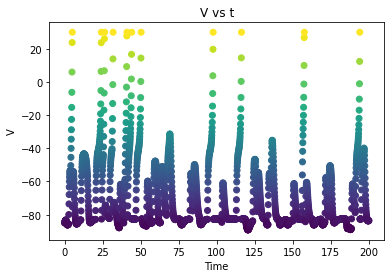

In [48]:
T=np.linspace(0, 200, 2000)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(T, VV, c=VV)
ax.set_title("V vs t")
ax.set_ylabel('V')
ax.set_xlabel('Time')

mean= 40.305 variance= 3.2019749999999876
minh, mexc spikerate: 9986.65 9993.6


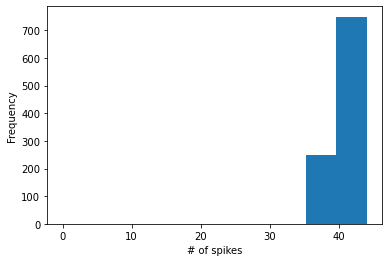

In [10]:
#number of spikes in each section
plt.hist(spikeslist)
plt.xlabel('# of spikes')
plt.ylabel('Frequency')
plt.show

#mean and variance
mean=sum(spikeslist)/len(spikeslist)
variance=sum((i-mean)**2 for i in spikeslist)/len(spikeslist)
print("mean=",mean, "variance=", variance)

#firing rates
minhrate=sum(minhlist)/(tmax)*1000 #spikes/sec
mexcrate=sum(mexclist)/(tmax)*1000 #spikes/sec
print ("minh, mexc spikerate:", minhrate, mexcrate)

<function matplotlib.pyplot.show(close=None, block=None)>

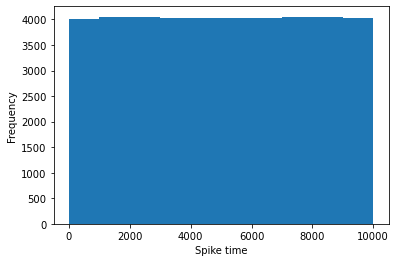

In [11]:
#inter-spike intervals
plt.hist(tjlist)
plt.xlabel('Spike time')
plt.ylabel('Frequency')
plt.show

In [66]:
#recast variables as balanced
Nexc=100
Ninh=100
rexc=.1
rinh=0.1
Gexc=20
Ginh=9
Esyninh=-82.7
tmax=2000
V=-82.7
timestep=.01

In [67]:
VV=[]
uu=[]
tmin=0
spikes=0
spikeslist=[]
tj=0
tjlist=[]
minhlist=[]
mexclist=[]
Ainh=0
Binh=0
Aexc=0
Bexc=0
ninh=((Tau2inh/Tau1inh)**(Tau2inh/(Tau1inh-Tau2inh))-(Tau2inh/Tau1inh)**(Tau1inh/(Tau1inh-Tau2inh)))**-1
nexc=((Tau2exc/Tau1exc)**(Tau2exc/(Tau1exc-Tau2exc))-(Tau2exc/Tau1exc)**(Tau1exc/(Tau1exc-Tau2exc)))**-1

while tmin<(tmax-timestep):
    minh=np.random.binomial(Ninh, rinh*timestep)
    minhlist.append(minh)
    mexc=np.random.binomial(Nexc, rexc*timestep)
    mexclist.append(mexc)
    Psinh=ninh*(Ainh-Binh)
    Psexc=nexc*(Aexc-Bexc)
    Isinh=Ginh*Psinh*(V-Esyninh)
    Isexc=Gexc*Psexc*(V-Esynexc)
    I=Isexc+Isinh
    V = V + timestep*(0.04*V**2+5*V+140-u-I)
    u = u + timestep*a*(b*V-u)
    if minh>0:
        Ainh=Ainh+minh*dPsinh*(1-Psinh)
        Binh=Binh+minh*dPsinh*(1-Psinh)
    else:
        Ainh=Ainh+timestep*(-Ainh/Tau1inh)
        Binh=Binh+timestep*(-Binh/Tau2inh)
    if mexc>0:
        Aexc=Aexc+mexc*dPsexc*(1-Psexc)
        Bexc=Bexc+mexc*dPsexc*(1-Psexc)
    else:
        Aexc=Aexc+timestep*(-Aexc/Tau1exc)
        Bexc=Bexc+timestep*(-Bexc/Tau2exc)
    if V>30:
        VV.append(30)
        V=c
        u=u+d
        spikes+=1 #tracker for 2.b spiking in bins
        tj=tmin-tj #tracker for 2.b inter spiek interval
        tjlist.append(tj)
    else:
        VV.append(V)
    if (tmin%20<0.01): #at bin size, creates list item of spikes and resets counter
        spikeslist.append(spikes)
        spikes=0
    uu.append(u)
    tmin+=timestep



Text(0.5, 0, 'Time')

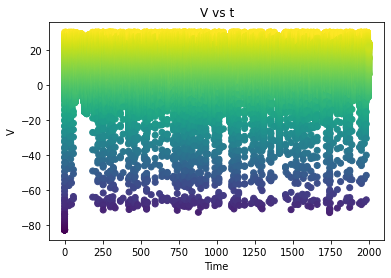

In [68]:
T=np.linspace(0, 2000, 200000)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(T, VV, c=VV)
ax.set_title("V vs t")
ax.set_ylabel('V')
ax.set_xlabel('Time')

mean= 2.46 variance= 6.228400000000002
minh, mexc spikerate: 9966.5 9905.5


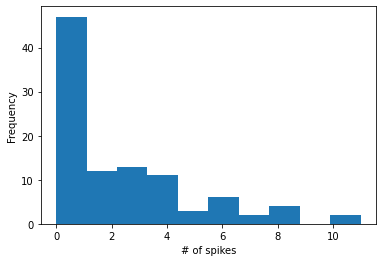

In [69]:
#number of spikes in each section
plt.hist(spikeslist)
plt.xlabel('# of spikes')
plt.ylabel('Frequency')
plt.show

#mean and variance
mean=sum(spikeslist)/len(spikeslist)
variance=sum((i-mean)**2 for i in spikeslist)/len(spikeslist)
print("mean=",mean, "variance=", variance)

#firing rates
minhrate=sum(minhlist)/(tmax)*1000 #spikes/sec
mexcrate=sum(mexclist)/(tmax)*1000 #spikes/sec
print ("minh, mexc spikerate:", minhrate, mexcrate)

<function matplotlib.pyplot.show(close=None, block=None)>

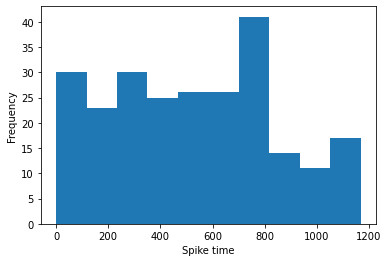

In [16]:
#inter-spike intervals
plt.hist(tjlist)
plt.xlabel('Spike time')
plt.ylabel('Frequency')
plt.show

In [70]:
#distance based correlation matrix
def construct_corr_matrix(max_corr, corr_length, PREF_ANG_DISTS, N):
    return max_corr * (np.exp(-PREF_ANG_DISTS / corr_length) - np.eye(N)) + np.eye(N)
#covariance matrix
def construct_cov_matrix(max_corr, corr_length, PREF_ANG_DISTS, N):
    sigma=0.2
    corr_mtx = construct_corr_matrix(max_corr, corr_length, PREF_ANG_DISTS, N)
    stds_mtx = sigma * np.eye(N) # matrix of standard deviations
    return np.dot(stds_mtx, np.dot(corr_mtx, stds_mtx))


In [73]:
max_corr = 1.0
corr_length = 0.35
pop = np.linspace(2, 100, 11)
variancelist=[]
meanlist=[]
Nlist=[]
sigma_s=np.random.normal(0, .5) #shared noise generated once
sigma_i=0.1 #independent noise generated every time
for p in pop:
    N=int(p)
    Nlist.append(N)
    VV=[]
    uu=[]
    tmin=0
    tmax=200
    spikes=0
    spikeslist=[]
    tj=0
    tjlist=[]
    minhlist=[]
    mexclist=[]
    Ainh=0
    Binh=0
    Aexc=0
    Bexc=0
    pref_stims = np.linspace(-np.pi, np.pi, int(N))
    PREF_ANG_DISTS = pref_stims - pref_stims[:,None]
    PREF_ANG_DISTS = np.absolute(PREF_ANG_DISTS)
    stim = 0
    mean_pop_res = tuning_curve_theta(pref_stims, stim)
    corr_mtx = construct_corr_matrix(max_corr, corr_length, PREF_ANG_DISTS, N)
    cov_mtx = construct_cov_matrix(max_corr, corr_length, PREF_ANG_DISTS, N)
    while tmin<(tmax-timestep):
        minh=np.random.binomial(N, rinh*timestep)
        minhlist.append(minh)
        mexc=np.random.binomial(N, rexc*timestep)
        mexclist.append(mexc)
        Psinh=ninh*(Ainh-Binh)
        Psexc=nexc*(Aexc-Bexc)
        Isinh=Ginh*Psinh*(V-Esyninh)*tuning_curve_theta(stim, stim)
        Isexc=Gexc*Psexc*(V-Esynexc)*tuning_curve_theta(stim, stim)
        I=Isexc+Isinh#+np.random.normal(0, sigma_i)+sigma_s
        V = V + timestep*(0.04*V**2+5*V+140-u-I)
        u = u + timestep*a*(b*V-u)
        if minh>0:
            Ainh=Ainh+minh*dPsinh*(1-Psinh)
            Binh=Binh+minh*dPsinh*(1-Psinh)
        else:
            Ainh=Ainh+timestep*(-Ainh/Tau1inh)
            Binh=Binh+timestep*(-Binh/Tau2inh)
        if mexc>0:
            Aexc=Aexc+mexc*dPsexc*(1-Psexc)
            Bexc=Bexc+mexc*dPsexc*(1-Psexc)
        else:
            Aexc=Aexc+timestep*(-Aexc/Tau1exc)
            Bexc=Bexc+timestep*(-Bexc/Tau2exc)
        if V>30:
            VV.append(30)
            V=c
            u=u+d
            spikes+=1 #tracker for 2.b spiking in bins
            tj=tmin-tj #tracker for 2.b inter spiek interval
            tjlist.append(tj)
        else:
            VV.append(V)
        if (tmin%20<0.01): #at bin size, creates list item of spikes and resets counter
            spikeslist.append(spikes)
            spikes=0
        uu.append(u)
        tmin+=timestep
    #mean and variance
    mean=sum(spikeslist)/len(spikeslist)
    meanlist.append(mean)
    variance=sum((i-mean)**2 for i in spikeslist)/len(spikeslist)
    variancelist.append(variance)


In [119]:
print (np.size(VV))

199


Text(0.5, 0, 'Time')

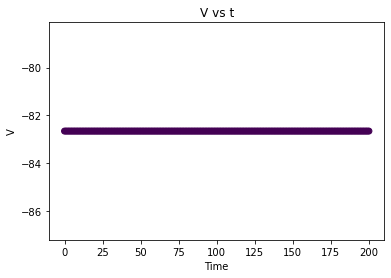

In [120]:
T=np.linspace(0, 200, 199)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(T, VV, c=VV)
ax.set_title("V vs t")
ax.set_ylabel('V')
ax.set_xlabel('Time')

In [74]:
pop = np.linspace(2, 400, 5)
variancelist=[]
meanlist=[]
Nlist=[]
sigma_s=np.random.normal(0, .5) #shared noise generated once
sigma_i=0.1 #independent noise generated every time
for p in pop:
    N=int(p)
    Nlist.append(N)
    VV=[]
    uu=[]
    tmin=0
    tmax=200
    spikes=0
    spikeslist=[]
    tj=0
    tjlist=[]
    minhlist=[]
    mexclist=[]
    pref_stims = np.linspace(-np.pi, np.pi, int(N))
    PREF_ANG_DISTS = pref_stims - pref_stims[:,None]
    PREF_ANG_DISTS = np.absolute(PREF_ANG_DISTS)
    stim = 0
    mean_pop_res = tuning_curve_theta(pref_stims, stim)
    corr_mtx = construct_corr_matrix(max_corr, corr_length, PREF_ANG_DISTS, N)
    cov_mtx = construct_cov_matrix(max_corr, corr_length, PREF_ANG_DISTS, N)
    while tmin<(tmax-timestep):
        mexc=0
        minh=0
        for k in Nlist:
            rng_fire=np.random.normal(0, np.pi/3)
            exc_response=tuning_curve_theta(rng_fire+np.random.normal(0, sigma_i), stim)
            if exc_response > 0.5:
                mexc+=1
            inh_response=tuning_curve_theta(rng_fire+np.random.normal(0, sigma_i), stim)
            if inh_response > 0.5:
                minh+=1      
        I=(mexc-minh)+sigma_s
        V = V + timestep*(0.04*V**2+5*V+140-u-I+20)
        u = u + timestep*a*(b*V-u)
        if V>30:
            VV.append(30)
            V=c
            u=u+d
            spikes+=1 #tracker for 2.b spiking in bins
            tj=tmin-tj #tracker for 2.b inter spiek interval
            tjlist.append(tj)
        else:
            VV.append(V)
        if (tmin%20<0.01): #at bin size, creates list item of spikes and resets counter
            spikeslist.append(spikes)
            spikes=0
        uu.append(u)
        tmin+=timestep
    #mean and variance
    mean=sum(spikeslist)/len(spikeslist)
    meanlist.append(mean)
    variance=sum((i-mean)**2 for i in spikeslist)/len(spikeslist)
    variancelist.append(variance)


Text(0.5, 0, 'Time')

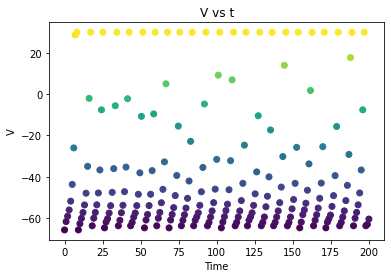

In [135]:
T=np.linspace(0, 200, 199)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(T, VV, c=VV)
ax.set_title("V vs t")
ax.set_ylabel('V')
ax.set_xlabel('Time')

In [72]:
#0 is Exc 1 is Inh

def construct_neuron():
    Type=np.random.binomial(1, 0.5)
    preference=np.random.normal(0, np.pi/3)
    #preference=0
    V=0
    return [Type, preference, V, 0]

A=1 #Amplitude
omega=.7 #tuning width

def tuning_curve(pref_stim, stim):
    return A * np.exp( - (stim - pref_stim)**2 / (2 * omega**2) )

def tuning_curve_theta(pref_stim, opening_angle):
    return tuning_curve(pref_stim, opening_angle)

In [107]:
pop = np.linspace(150, 800, 10)
Tau=20
timestep=1
tmax=200
spikeslist=[]
meanlist=[]
variancelist=[]
Nlist=[]
sigma_s=1   #np.random.normal(0, .5) #shared noise generated once
sigma_i=0.1 #independent noise generated every time
for p in pop:
    N=int(p)
    Nlist.append(N)
    Neurons=[]
    for i in range(N):
        new=construct_neuron()
        Neurons.append(new)
    tmin =0
    while tmin<(tmax-timestep):
        stim=0
        
        #cumulative response of all-to-all presynaptic neurons
        for n in Neurons:
            g_of_s=[]
            for k in Neurons:
                g=tuning_curve_theta(k[1]+sigma_s, stim)
                if k[0] == 0:
                    g_of_s.append(g)
                if k[0] == 1:
                    g_of_s.append(-g)
            g_tot=np.sum(g_of_s)-n[1]
            
            #New voltage
            n[2]+=timestep*(-n[2]/Tau+g_tot)
            
            #spike scenario
            if n[2]>1:
                n[3]+=1
                n[2]=0
        if (tmin%20<0.01): #at bin size, creates list item of spikes and resets counter
            for j in Neurons:
                spikeslist.append(j[3])
                j[3]=0    
        tmin+=timestep
    mean=sum(spikeslist)/len(spikeslist)
    meanlist.append(mean)
    variance=sum((i-mean)**2 for i in spikeslist)/len(spikeslist)
    variancelist.append(variance)

Text(0.5, 0, 'Population')

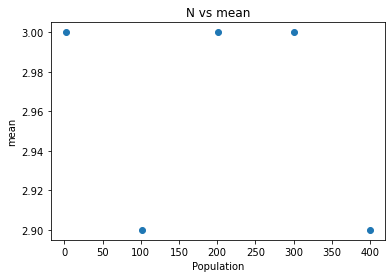

In [132]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Nlist, meanlist)
ax.set_title("N vs mean")
ax.set_ylabel('mean')
ax.set_xlabel('Population')

Text(0.5, 0, 'Population')

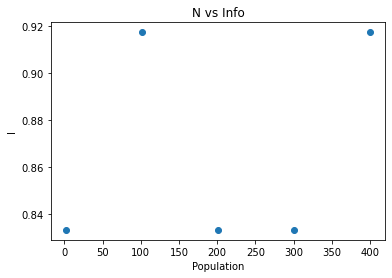

In [133]:
Infolist=1/np.array(variancelist)
#Infolist_t=1/np.array(variancelist)**2/tmax

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Nlist, Infolist)
ax.set_title("N vs Info")
ax.set_ylabel('I')
ax.set_xlabel('Population')

Text(0.5, 0, 'Population')

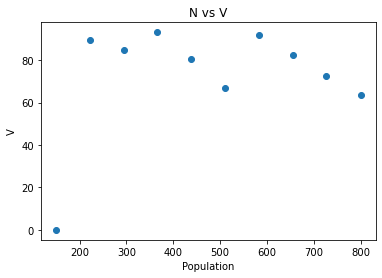

In [110]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(Nlist, variancelist)
ax.set_title("N vs V")
ax.set_ylabel('V')
ax.set_xlabel('Population')

In [111]:
print(ninh)

4.0
